# EDA to make Predictions on Titanic dataset
## Contents of the notebook:
### Part 1: Exploratory Data Analysis (EDA):
Analysis of the features.
Finding any relations or trends considering multiple features.
### Part 2: Feature Engineering and Data Cleaning:
Adding any new features.
Removing redundant features.
Converting features into suitable form for modeling.
### Part 3: Predictive Modeling:
Running Basic Algorithms.
Cross Validation
Ensembling
Important Features Extraction    

## Part 1: Exploratory Data Analysis (EDA):

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')    
# styles in matplot: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os

In [9]:
data=pd.read_csv('C:/Users/Moon/Documents/codesquadz/train.csv')

In [11]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

the Age, Cabin and Embarked have null values which needs to be fixed
## how many survived??

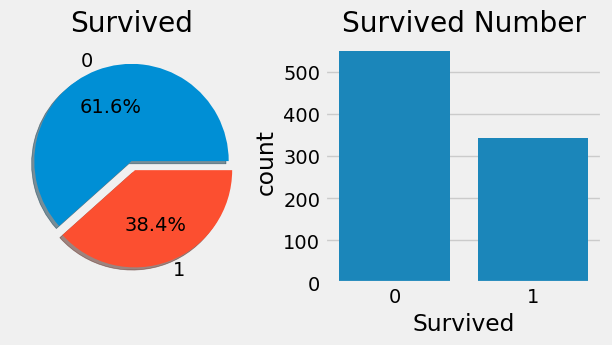

In [17]:
f,ax=plt.subplots(1,2,figsize=(7,3))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                         autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived Number')
plt.show()

# 0=not survived, 1=survived

<b>dead = 549,  survived = 342, total people on ship = 891</b>

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn’t.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

First let us understand the different types of features.
# Types Of Features
## Categorical Features: 
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
#### Categorical Features in the dataset: Sex, Embarked.
## Ordinal Feature: 
An ordinal feature is one where the values have a meaningful order, but the intervals between the values are not necessarily uniform. For example, "Height" with values like Tall, Medium, and Short,then Height is an ordinal variable.Here we can have a relative sort in the variable.
#### Ordinal Features in the dataset: PCIass
## Continuous Feature: 
A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.
#### Continuous Features in the dataset: Age

# Analysing the Features 
## Sex--> Categorical Feature

In [19]:
# counting no. of male female survived
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<b>females:- dead = 81,survived = 233 | males :- dead = 468, survived = 109</b>

In [21]:
# Get total count of males and females
sex_counts = data['Sex'].value_counts()
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


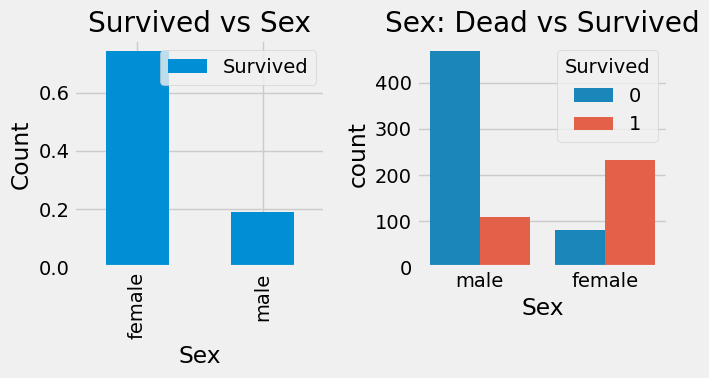

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(7,4))

# Plot bar chart for survival count by sex
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived vs Sex')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count')

# Plot countplot for survival by sex
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Dead vs Survived')

# Show plots
plt.tight_layout()
plt.show()


## insights
no. of males on ship= 577, females=314
no. of males survived = 109, females = 233

survival rates for a women on the ship is around 75% while that for a men is 18-19%, 
<b>though it were the men who saved women and children instead of thinking about their own lives.</b>

This looks to be a <b>very important</b> feature for modeling. But still it is important to check upon other features too to find out the best one

# Pclass--> Ordinal Feature

In [25]:
# to count survived person from each class
pd.crosstab(data.Pclass,data.Survived,margins=True)
#style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


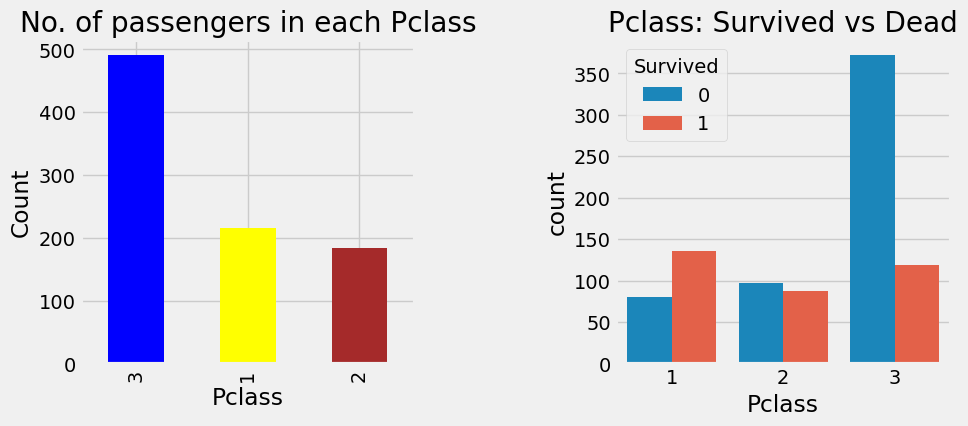

In [27]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
plt.subplots_adjust(wspace=0.6)  # Adjust the value as needed

data['Pclass'].value_counts().plot.bar(color=['blue','yellow','brown'],
                                      ax=ax[0])
ax[0].set_title('No. of passengers in each Pclass')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

<b>Passengers of Pclass 1 were given higher priority while rescue.</b>

Even though the number of passengers in <b>Pclass 3 were a lot higher, still the no. of survival from them is very low, somewhere around 25%</b>

for <b>Pclass 1 63% survived</b>

for <b>Pclass 2 48% survived</b>

# Now checking Sex and Pclass together

In [30]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='spring')

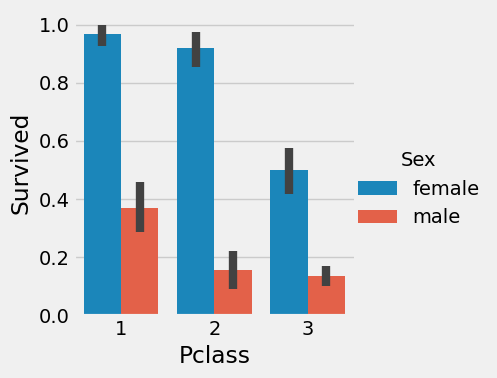

In [32]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='bar', height=4, aspect=1)
plt.show()

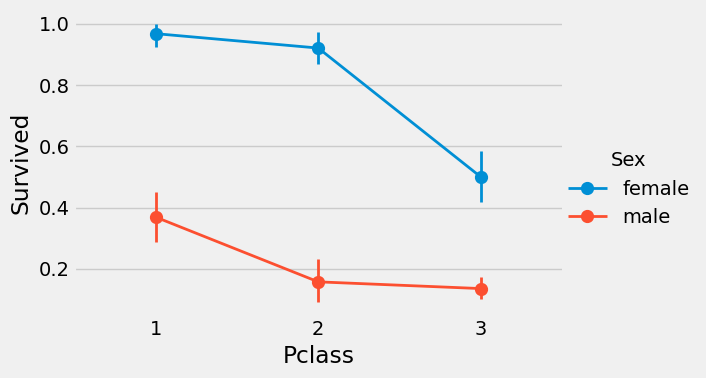

In [34]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='point', height=4, aspect=1.5,linewidth=2,markersize=8)
plt.show()

We use <b>FactorPlot</b> in this case, because they make the separation of categorical values easy.

Looking at the <b>CrossTab and the FactorPlot</b>, we can make an inference that survival <b>Women from Pclass1</b> is about <b>95-96%</b> as only 3 out of 94 women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyze other features.

# Age -> Continuous Feature

In [36]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


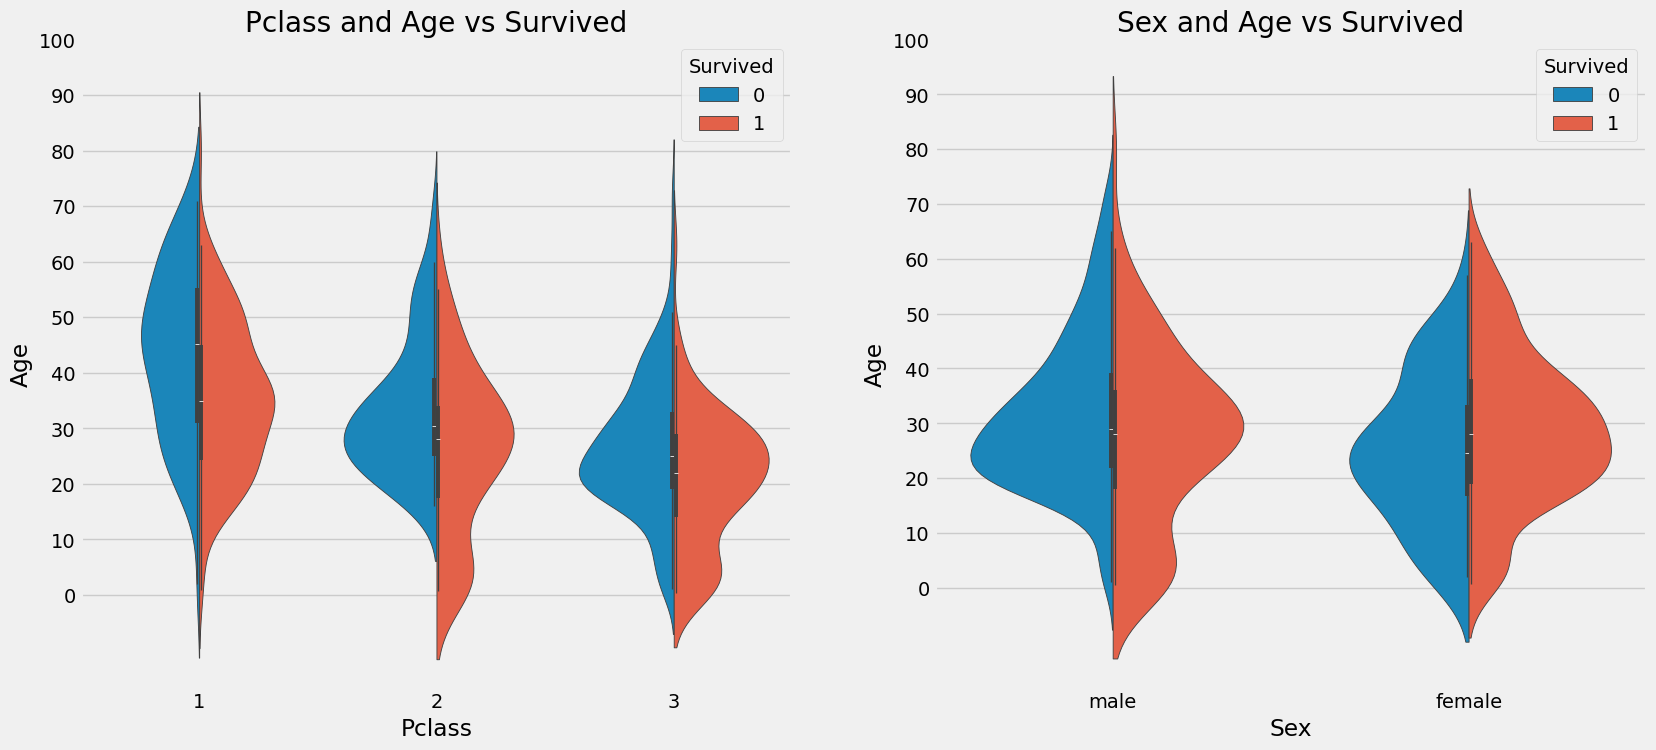

In [38]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass',y= 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### Observations:
1) no. of children increases with Pclass and the survival rate of passengers below 10 is good irrespective of their Pclass
2) survival chances for passengers age 20-50 from Pclass1 is high and even better for women
3) For males, survival chances decreases with increase in age.

The age feature has 177 null values, we need to replace them with the mean or median values of age column.

but we can not assign an average of 29 years to a passenger of 4 years, hence we need to assign values according to names because the names have Mr. and Mrs. factor that can help in such situation

#### "What's in a Name??"----> Feature

In [40]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')    # extracting the salutations
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

Okay so here we are using the Regex:([A-Za-z]+)...So what it does is,it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the initials from the Name.

In [42]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')  # checking the initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [44]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [46]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')  # checking the initials with the sex

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [48]:
data.groupby('Initial')['Age'].mean()      # average age by initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [50]:
#Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data. Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data. Initial=='Mrs'),'Age']=36 
data.loc[(data.Age.isnull())&(data. Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data. Initial=='Other'), 'Age']=46

In [52]:
data.isnull().sum()
#data.Age.isnull().any() #So no null values left finally

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

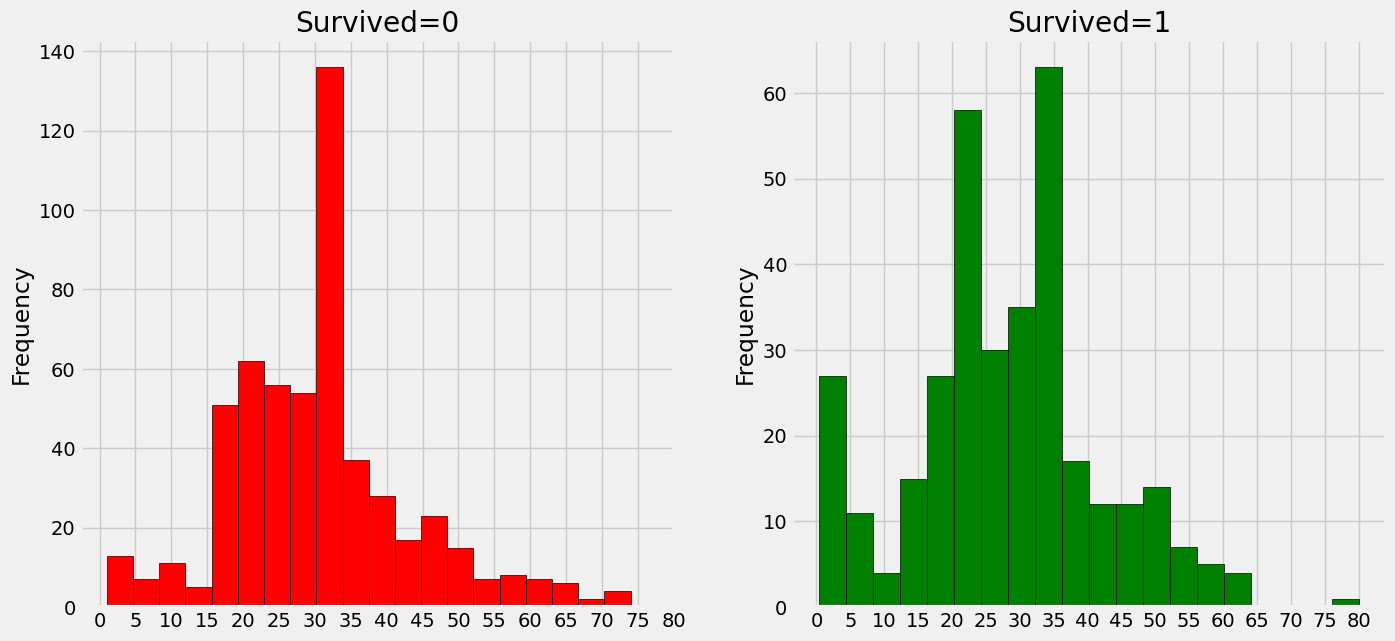

In [54]:
f,ax=plt.subplots(1,2,figsize=(15,7))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks (x1)
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

#### Observations: 
1)The Toddiers(age<5) were saved in large numbers.(The Women and Child First Policy). 

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.


## Embarked--> Categorical Value

In [56]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port of Embarkation

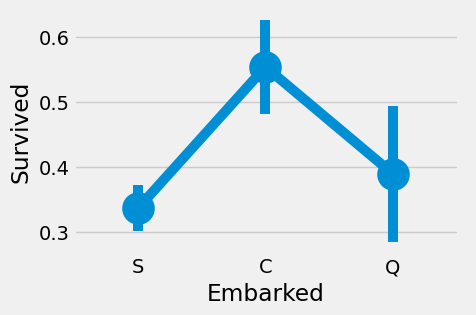

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()


The chances for survival for Port C is highest around 0.55 while it is lowest for S.

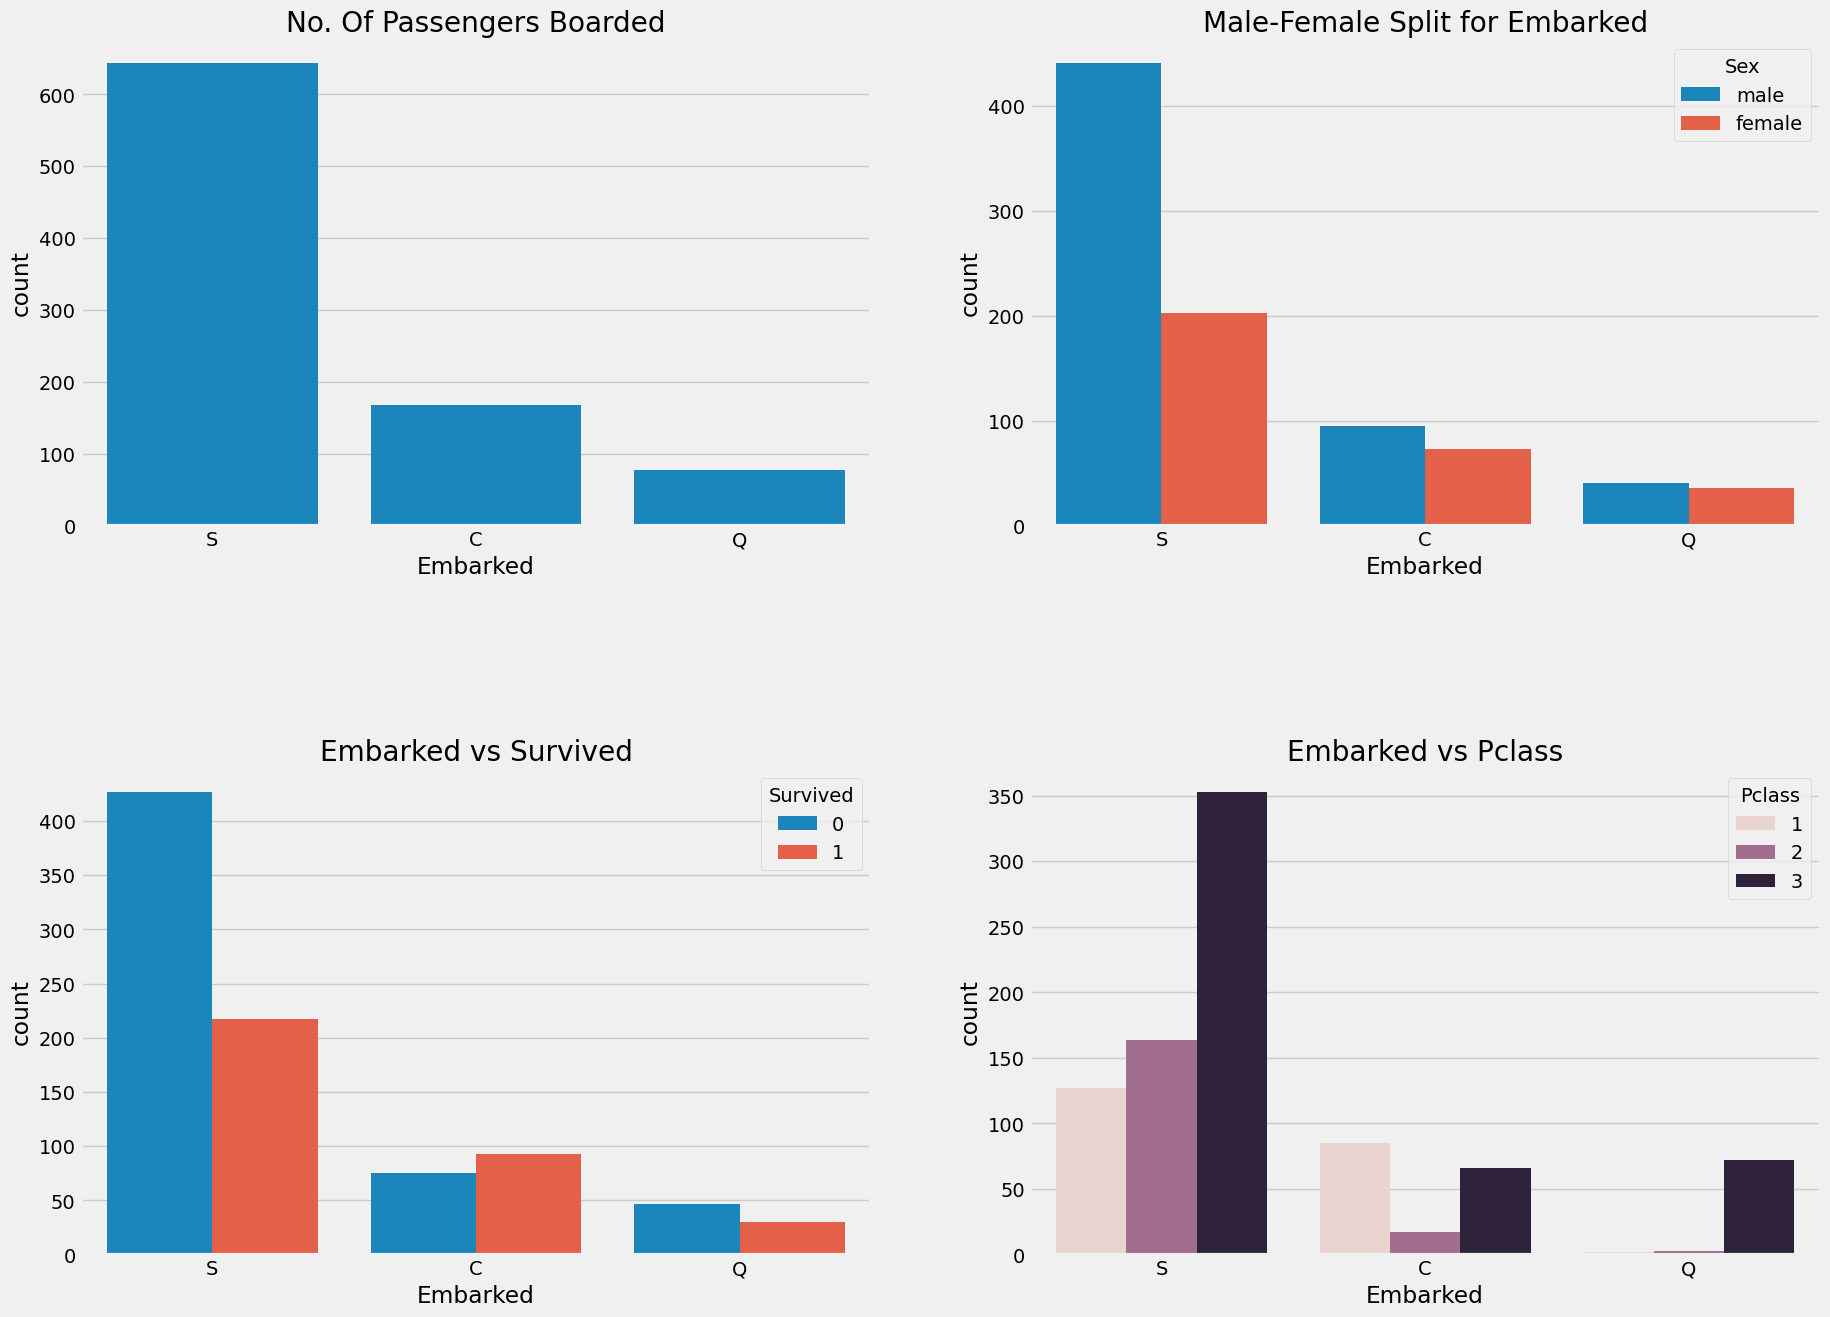

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# Plot the number of passengers boarded
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

# Plot the male-female split for embarked
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# Plot the number of survivors for each embarkment
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# Plot the class distribution for each embarkment
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Show the plot
plt.show()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## Observations: 
1)Maximum passengers boarded from S. Majority of them being from Pclass3. 

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers. 

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here because passengers from Pclass3 around 81% didn't survive

4)Port Q had almost 81% of the passengers from Pclass3 only.

## Observations:
1)The survival chances are almost 1 for women for Pclalss1 and Pclass2 irrespective of the Pclass. 

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low. (Money Matters) 

3)Port Q looks to be unlukiest for Men, as almost all were from Pclass 3. 


## Filling Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S

In [46]:
data['Embarked'].fillna('s', inplace=True) 

In [51]:
data.Embarked.isnull().any()  # Finally No NaN values 

False

# SibSp-->Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister 

Spouse = husband, wife 

In [53]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


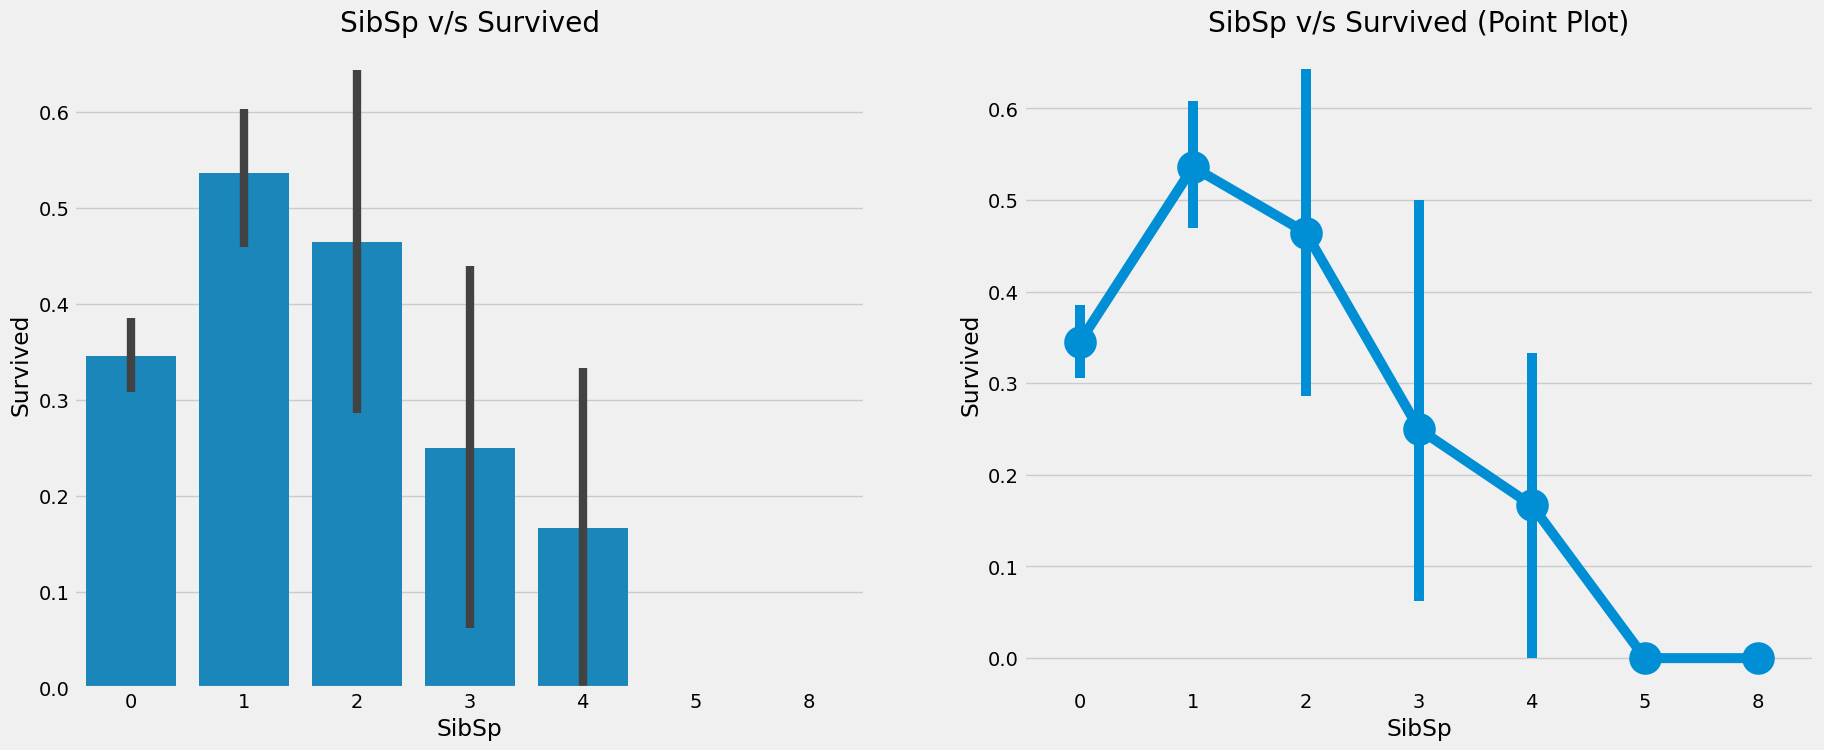

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Barplot for SibSp vs Survived
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp v/s Survived')

# Point plot for the same data to see a different visualization
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp v/s Survived (Point Plot)')

# Show the plot
plt.show()


In [61]:
import pandas as pd

# Create the crosstab with background gradient
crosstab = pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

# Display the crosstab
crosstab


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3. 

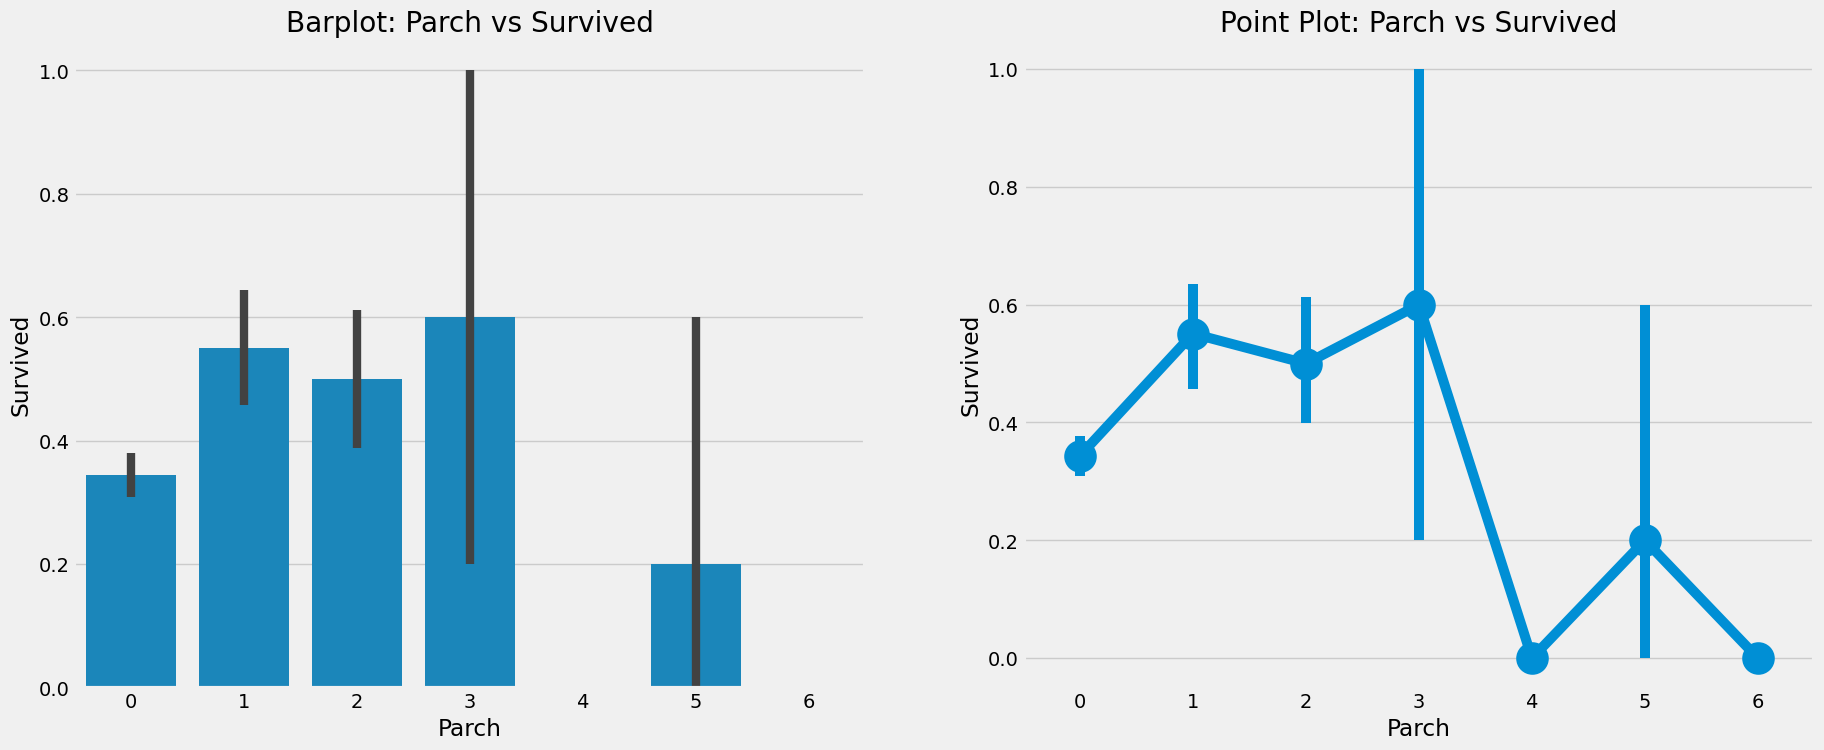

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Barplot for Parch vs Survived
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Barplot: Parch vs Survived')

# Point plot for Parch vs Survived to visualize data differently
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Point Plot: Parch vs Survived')

# Show the plot
plt.show()



## Observations: 
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up. 

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship. 

# Fare--> Continous Feature 

In [71]:
print('Highest Fare was:', data['Fare'].max()) 
print('Lowest Fare was:', data['Fare'].min()) 
print('Average Fare was:', data['Fare'].mean()) 

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


The lowest fare is 0.0. Wow!! a free luxorious ride. 

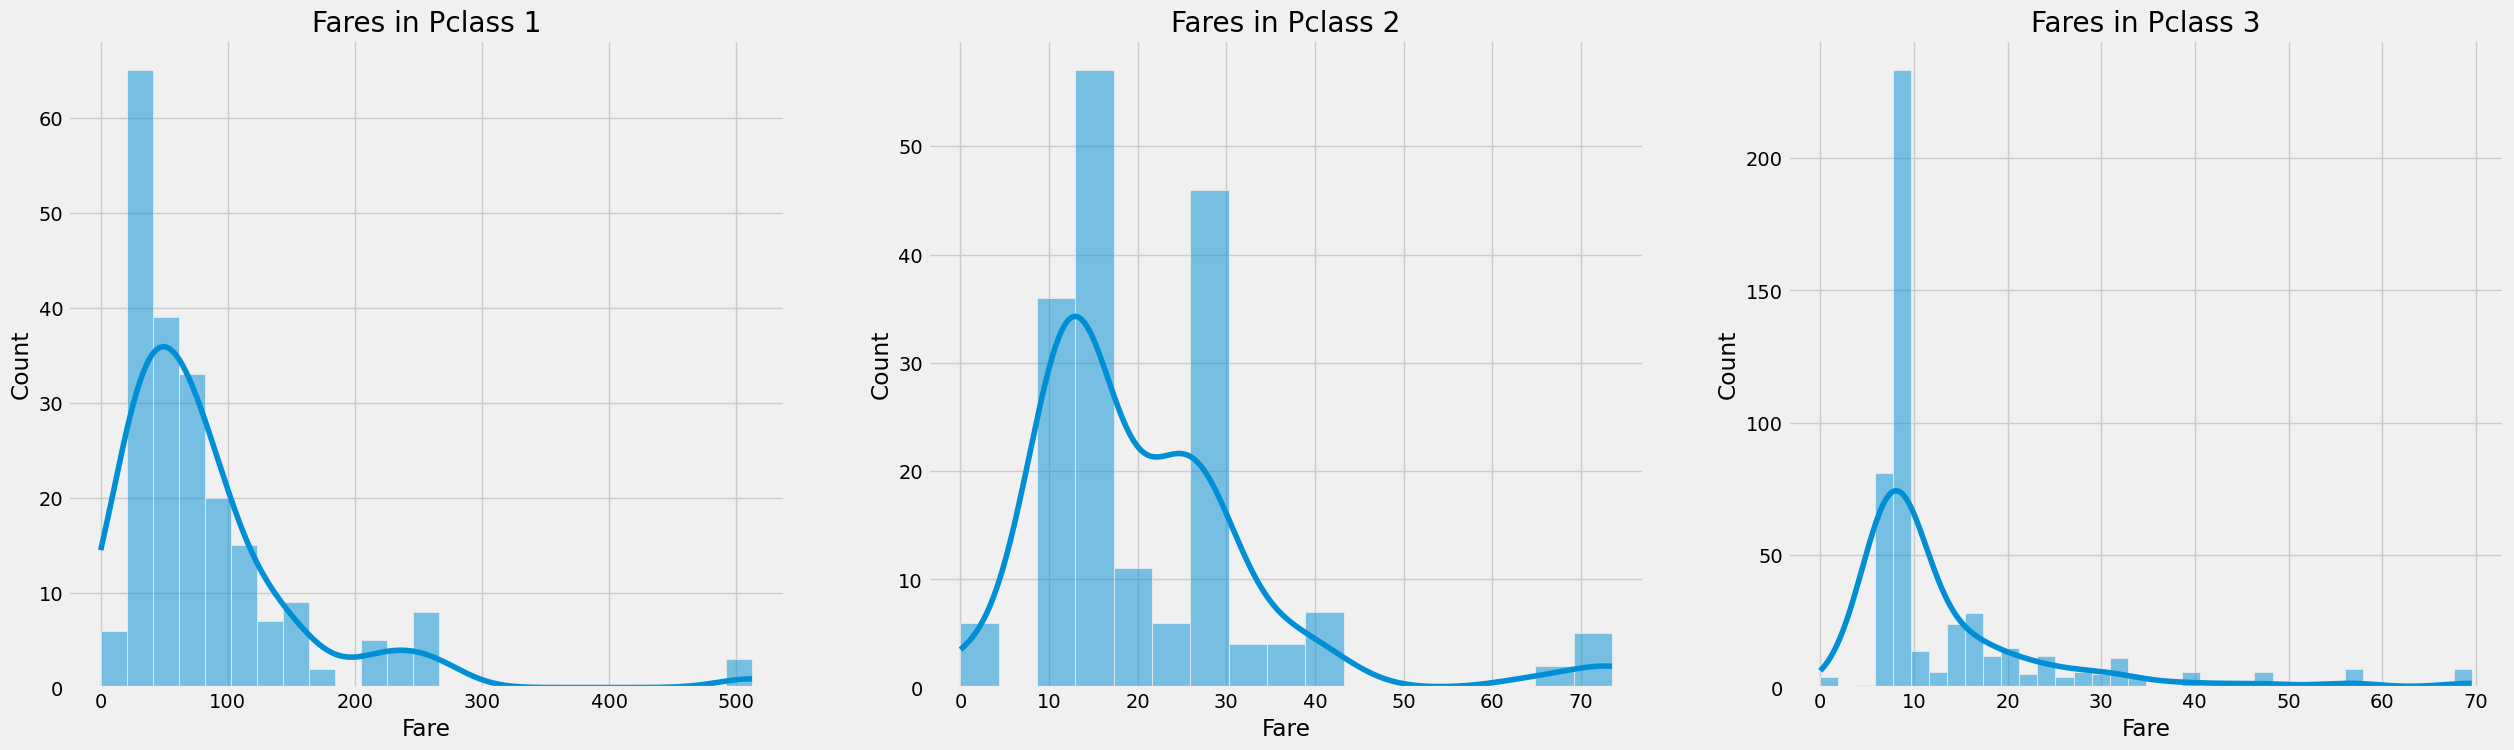

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 3, figsize=(28, 8))

# Plot distribution of Fare for Pclass 1
sns.histplot(data[data['Pclass'] == 1].Fare, kde=True, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# Plot distribution of Fare for Pclass 2
sns.histplot(data[data['Pclass'] == 2].Fare, kde=True, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# Plot distribution of Fare for Pclass 3
sns.histplot(data[data['Pclass'] == 3].Fare, kde=True, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

# Show the plot
plt.show()
